<a href="https://colab.research.google.com/github/Kmrreddy111/Manjunath_Reddy/blob/main/yield_curve_analysis_Indian_Gsec_15_01_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

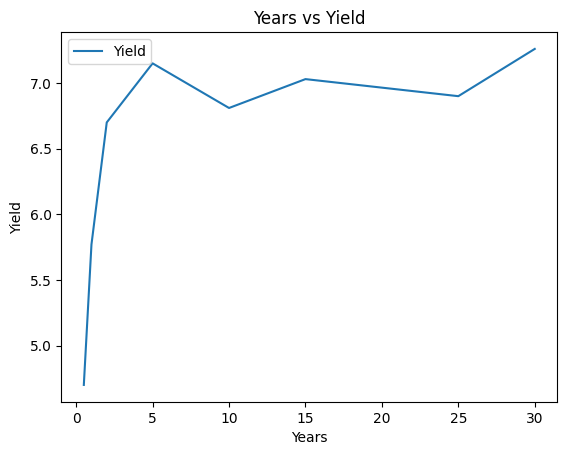

In [1]:
# Install pandas and matplotlib if not already installed
%pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
yield_data = pd.read_csv('/content/indian_Gsec_15-01-2024.csv')

# Plot years vs yield
yield_data.plot(x='Years', y='Yield', kind='line')
plt.xlabel('Years')
plt.ylabel('Yield')
plt.title('Years vs Yield')
plt.show()

# New Section

The standard deviation of the Yield is: 0.8167925073113734


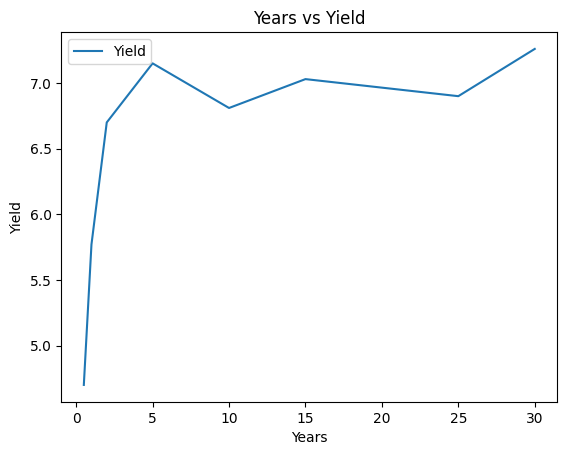

In [7]:
# prompt: read Yield coulum from Indian_Gse_ table caluclate standard deviation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Install pandas, matplotlib, and numpy if not already installed
!pip install pandas matplotlib numpy

# Read data from CSV file
try:
    yield_data = pd.read_csv('/content/indian_Gsec_15-01-2024.csv')
    # Calculate the standard deviation of the 'Yield' column
    yield_std = np.std(yield_data['Yield'])
    print(f"The standard deviation of the Yield is: {yield_std}")

    # Plot years vs yield
    yield_data.plot(x='Years', y='Yield', kind='line')
    plt.xlabel('Years')
    plt.ylabel('Yield')
    plt.title('Years vs Yield')
    plt.show()
except FileNotFoundError:
    print("Error: File not found. Please ensure 'indian_Gsec_15-01-2024.csv' is in the /content/ directory.")
except KeyError:
    print("Error: 'Yield' column not found in the CSV file. Please check your file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimized Parameters:
Beta0: 7.1549
Beta1: -5.6990
Beta2: -6.1299
Tau: 0.1073


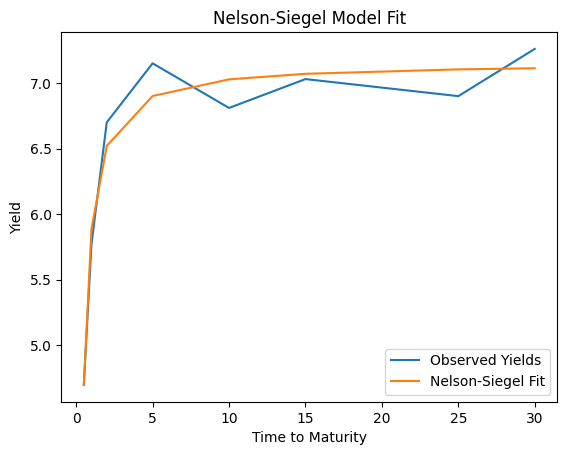

In [8]:
# prompt: Fit a Nelson-Siegel model

import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Assuming yield_data is already loaded as in the previous code

def nelson_siegel(params, t):
    beta0, beta1, beta2, tau = params
    return beta0 + beta1 * (1 - np.exp(-t / tau)) / (t / tau) + beta2 * ((1 - np.exp(-t / tau)) / (t / tau) - np.exp(-t / tau))

def objective_function(params, t, y):
    y_pred = nelson_siegel(params, t)
    return np.sum((y - y_pred)**2)

# Initial guess for parameters
initial_params = [0.05, 0.01, -0.01, 1]

# Time to maturity (in years)
t = yield_data['Years']

# Observed yields
y = yield_data['Yield']

# Optimization
result = minimize(objective_function, initial_params, args=(t, y), method='Nelder-Mead')

# Optimized parameters
beta0, beta1, beta2, tau = result.x

print("Optimized Parameters:")
print(f"Beta0: {beta0:.4f}")
print(f"Beta1: {beta1:.4f}")
print(f"Beta2: {beta2:.4f}")
print(f"Tau: {tau:.4f}")


# Predicted yields
predicted_yields = nelson_siegel(result.x, t)

# Plot observed vs predicted yields
import matplotlib.pyplot as plt
plt.plot(t, y, label='Observed Yields')
plt.plot(t, predicted_yields, label='Nelson-Siegel Fit')
plt.xlabel('Time to Maturity')
plt.ylabel('Yield')
plt.title('Nelson-Siegel Model Fit')
plt.legend()
plt.show()

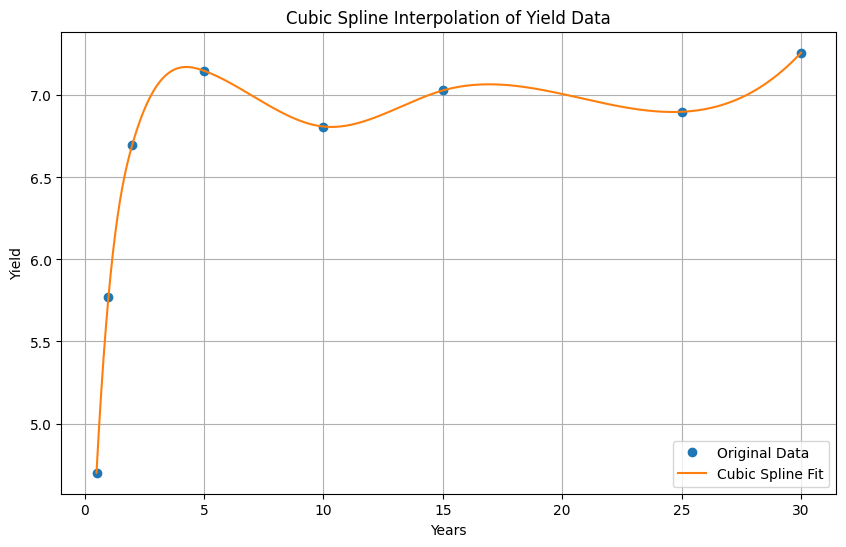

In [9]:
# prompt: Fit a Cubic-Spline model

import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import pandas as pd

# Assuming yield_data is already loaded as in the previous code
# If not, load it here:
try:
    yield_data = pd.read_csv('/content/indian_Gsec_15-01-2024.csv')
    x = yield_data['Years']
    y = yield_data['Yield']
except FileNotFoundError:
    print("Error: 'indian_Gsec_15-01-2024.csv' not found.")
    exit()
except KeyError:
    print("Error: 'Years' or 'Yield' column not found in the CSV file.")
    exit()


# Create the cubic spline interpolation
cs = CubicSpline(x, y)

# Generate points for the fitted curve
x_fit = np.linspace(x.min(), x.max(), 300)  # Increased points for smoother curve
y_fit = cs(x_fit)

# Plot the original data and the cubic spline fit
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_fit, y_fit, '-', label='Cubic Spline Fit')
plt.xlabel('Years')
plt.ylabel('Yield')
plt.title('Cubic Spline Interpolation of Yield Data')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# prompt: Compare the models in terms of 1) fit and 2) interpretation.

# Comparison of Nelson-Siegel and Cubic Spline models

# 1. Fit:

# Nelson-Siegel:
#   - The Nelson-Siegel model's fit is assessed by minimizing the sum of squared differences between observed and predicted yields.
#   - The quality of fit depends heavily on the initial parameter guess and the optimization method used. The Nelder-Mead method is used here, but other methods may provide a better fit.
#   - Visually inspect the plot of observed vs predicted yields to assess how well the curve captures the data's overall trend and fluctuations. A good fit would show the predicted curve closely following the observed yield data points.

# Cubic Spline:
#   - The cubic spline interpolates directly through each observed data point.  Therefore, by design, it perfectly fits the observed data in terms of interpolation.
#   - It's inherently smoother than the Nelson-Siegel model and can better capture short-term fluctuations.
#   - However, a drawback is that it might overfit to noisy data points.

# 2. Interpretation:

# Nelson-Siegel:
#   - The model parameters have a direct interpretation:
#     - beta0: the long-term level of the yield curve.
#     - beta1: the short-term component, capturing deviations from the long-term level.
#     - beta2: the medium-term component, reflecting the curvature of the yield curve.
#     - tau: the decay factor, influencing the speed at which the short- and medium-term components decay to zero.
#   - These parameters provide insights into the shape and dynamics of the yield curve. Changes in these parameters over time offer insights into how market expectations and other factors influence interest rates.

# Cubic Spline:
#   - The cubic spline doesn't offer readily interpretable parameters in the same way as the Nelson-Siegel model. It simply provides a smooth curve that passes through the observed data points.
#   - The lack of parameters means you cannot analyze the dynamics or factors driving yield curve changes through this model.  Its primary use is interpolation and smoothing.



# Conclusion:
# Choose Nelson-Siegel if you need an interpretable model with parameters related to the yield curve's dynamics. Use the Cubic Spline for smoothing or interpolating, especially when high accuracy within the observed data range is crucial, and where interpretation of the parameters is not needed.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Optimized Parameters:
Beta0: 7.1549
Beta1: -5.6990
Beta2: -6.1299
Tau: 0.1073


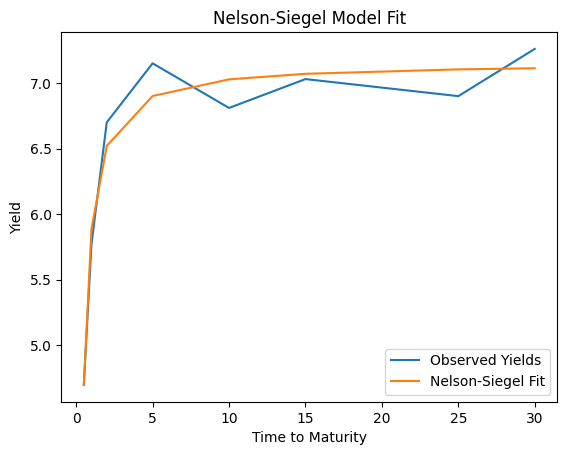

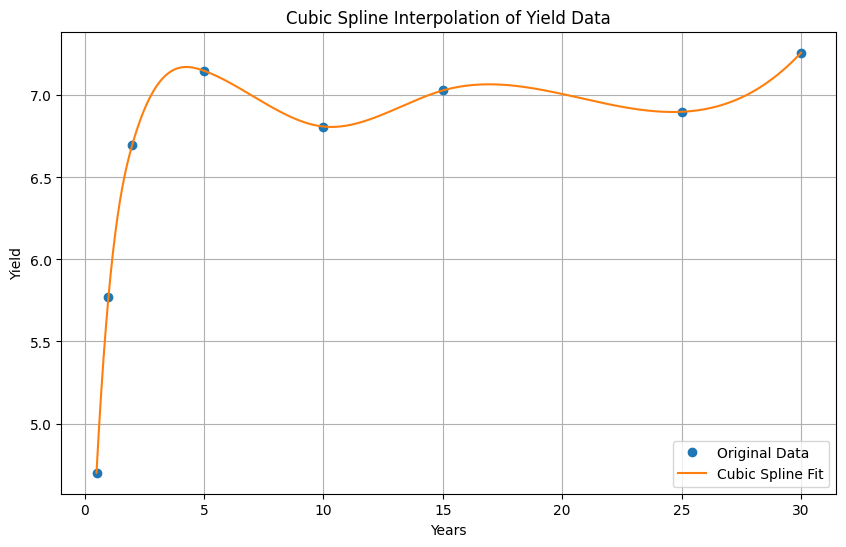

In [11]:
# prompt: Be sure to specify at the levels of model parameters

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import CubicSpline

# Install necessary libraries if not already installed
!pip install pandas matplotlib numpy scipy

# Define the Nelson-Siegel function
def nelson_siegel(params, t):
    beta0, beta1, beta2, tau = params
    return beta0 + beta1 * (1 - np.exp(-t / tau)) / (t / tau) + beta2 * ((1 - np.exp(-t / tau)) / (t / tau) - np.exp(-t / tau))

# Define the objective function for optimization
def objective_function(params, t, y):
    y_pred = nelson_siegel(params, t)
    return np.sum((y - y_pred)**2)

# Read data from CSV file with error handling
try:
    yield_data = pd.read_csv('/content/indian_Gsec_15-01-2024.csv')
    # Extract time to maturity and yields
    t = yield_data['Years']
    y = yield_data['Yield']
except FileNotFoundError:
    print("Error: 'indian_Gsec_15-01-2024.csv' not found.")
    exit()
except KeyError:
    print("Error: 'Years' or 'Yield' column not found in the CSV file.")
    exit()

# Initial parameter guess for Nelson-Siegel model
initial_params = [0.05, 0.01, -0.01, 1] #@param {type:"raw"}

# Optimization using Nelder-Mead method
result = minimize(objective_function, initial_params, args=(t, y), method='Nelder-Mead')

# Extract optimized parameters
beta0, beta1, beta2, tau = result.x
print("Optimized Parameters:")
print(f"Beta0: {beta0:.4f}")
print(f"Beta1: {beta1:.4f}")
print(f"Beta2: {beta2:.4f}")
print(f"Tau: {tau:.4f}")


# Generate predicted yields using the optimized parameters
predicted_yields = nelson_siegel(result.x, t)


# Plot observed vs. predicted yields for Nelson-Siegel model
plt.plot(t, y, label='Observed Yields')
plt.plot(t, predicted_yields, label='Nelson-Siegel Fit')
plt.xlabel('Time to Maturity')
plt.ylabel('Yield')
plt.title('Nelson-Siegel Model Fit')
plt.legend()
plt.show()


# Cubic Spline Interpolation
cs = CubicSpline(t, y)
x_fit = np.linspace(t.min(), t.max(), 300)
y_fit = cs(x_fit)

# Plot the original data and the cubic spline fit
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'o', label='Original Data')
plt.plot(x_fit, y_fit, '-', label='Cubic Spline Fit')
plt.xlabel('Years')
plt.ylabel('Yield')
plt.title('Cubic Spline Interpolation of Yield Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prompt: smoothing data can be
# unethical. If Nelson-Siegel is smoothing the yield curve, is this considered
# unethical? Why or why not?

Using Nelson-Siegel to smooth the yield curve is **not inherently unethical**.  Whether it's problematic depends heavily on the context and how the smoothed data is used.

Here's a breakdown:

**Arguments against unethical smoothing (potential misuse):**

* **Misrepresentation:**  If the smoothed curve is presented as the *actual* yield curve without clearly disclosing the smoothing, it could mislead users who might believe they're seeing a precise representation of market data. This misrepresentation could be especially harmful to those unfamiliar with statistical modeling techniques.
* **Decision-Making Bias:** Decisions based on the smoothed curve could be biased if the smoothing masks important short-term fluctuations or outliers that are relevant to a particular investment strategy. For instance, an investor might miss a critical short-term opportunity or misjudge market risk.
* **Regulatory Concerns:** In some financial contexts, misrepresenting or manipulating market data can have regulatory implications, especially if the smoothing artificially improves a portfolio's performance metrics.


**Arguments for ethical smoothing (appropriate use):**

* **Noise Reduction:** Yield curve data often includes short-term noise due to market volatility, temporary events, and other factors. Smoothing can remove this noise, making it easier to discern the underlying trends and long-term patterns.
* **Model Input:** Many financial models require a smooth representation of the yield curve as input data.  The Nelson-Siegel model provides such a representation, essential for calculations like pricing of bonds or derivatives.  Not smoothing might introduce unnecessary instability into these models.
* **Visualization:** Visualizing the smoothed curve can make long-term yield curve trends and movements easier to understand.


**Ethical Considerations:**

The key to ethical use of Nelson-Siegel (or any smoothing technique) is **transparency and clarity**.  Whenever presenting or using a smoothed curve, explicitly state:

* **The method used:** (e.g., Nelson-Siegel)
* **The parameters:** (values of β0, β1, β2, and τ)
* **The purpose of smoothing:**  (e.g., for trend analysis, model input)
* **Limitations:**  (e.g., that the smoothed curve is an approximation of the actual data, short-term fluctuations are removed)
* **Context and Intended Audience**: How the information will be used and by whom, ensuring the method is suitable for the particular audience.

By being transparent about the smoothing process and its implications, the potential for misuse and misinterpretation is greatly reduced.
